# 差動アンプの仕様検討１ 

・利得　100前後：MEMSのアンプが20倍の利得だったこと，100倍あれば閉ループ時の利得設定誤差が1/100になる．良くはないがひどくもない．なお，一般的なオペアンプならば少なくとも60dB以上が必要である．

・回路形式　差動入力・差動出力とし，出力の同相電圧安定化のために同相帰還を内蔵させる．たぶん抵抗負荷の差動1段では利得が10倍前後であろうから，回路構成としては「差動2段＋ソースフォロワ出力段」となるだろう．さしたる根拠もないが，負荷は電圧計等の計測器を想定して，抵抗性で10kΩ以上で，負
荷容量は50pF以下としよう．

・帯域幅　不明：PMOSの容量関係のモデルパラメータの精度が分からないので，きっちり決めても仕方がない．試作して評価してみる．ただし，外付けで位相補償できるように配慮する．

・電源電圧　10V：PMOSしか使えないので，出力スイングが電源電圧いっぱいに振れない．できるだけ電源電圧は高い方が有利だが，切りのいいところで10Vとし，±5Vの2電源で設計する．

・その他，オフセット電圧，消費電流，動作温度範囲等も規定すべきだが，実測データがないので予測できない．

# 【gmの見積もり】

・抵抗(RL)負荷のソース接地1段増幅器の小信号利得(Av)は Av=-gm RL で与えられるから，まず使用するPMOSのgmがどれくらいあるかを調べておく必要があ
る．

・gmはドレイン電流(Id)に依存し，IDはゲート電圧(Vgs)に依存するので，結局，Vgsを変化させてgmがどれくらいになるかを調べる．このプロセスではゲート長(L)が6umのモデルが信用できないので，L=10umとL=14umのPMOSについてgmを調べよう．

・電源電圧が正負の5Vであることから考えて，RLの電圧降下が数VになるにはId=1mAなら数kΩで，Id=100uAなら数十kΩくらい必要である．一方，拡散抵抗
のシート抵抗が0.7kΩだから数十kΩから100kΩ位がサイズの関係から使える上限になる．これらを考慮するとPMOSの動作電流はおよそId=0.1mA~1mA前後が現実的である．よって，このあたりのIdにおけるgmをシミュレーションで見てみる．


・W/L=10のデバイスで，Id=0.1mA, 1mA，Vgs=1~10V, Vds=1~10Vの条件でgmをシミュレーションした．結果は次の通り：

        ------------------------------------------
        W/L [um/um]   Id [mA]     gm [mS]
        ------------------------------------------
            100/10            0.1       0.26 ~ 0.30
            100/10            1.0       0.15 ~ 0.72
            140/14            0.1       0.25 ~ 0.28
            140/14            1.0       0.18 ~ 0.75
        ------------------------------------------

        ざっくり，このあたりではgm≒0.3mS前後と考えてよかろう．誤差は倍半分だ．5極管領域ではgm∝√Idというのが理屈だが，Id=0.1mAと1mAでは3.16倍も違わず，2倍程度だ．つまり，Idは0.1mAでも1mAでもgmの値は2倍程度しか変わらない．

# 【10倍前後の差動利得を持つPMOS差動段のラフ設計】

・gmがあまり変わらないので，消費電流は少ない方が喜ばれるから，常識的に0.1mAとしておこう．つまり，設計の出発値として差動のテール電流を0.2mAに
する．

・Vin1=Vin2=0Vのとき，出力の同相電圧Vocmをどうするかだが，Vth0=-0.9Vだったから，共通ソースの電圧は約0.9Vになる．従って，仮にVocm=-3Vに設定すれば|Vds|=|Vocm-Vth0|=3.9Vとなる．このとき負荷抵抗RLには|VSS-Vocm|=2Vの電圧降下が生ずる．差動対1個当たりId=0.1mAだから，RL=2V/0.1mA=20kΩとすればつじつまが合う．さて，この時の差動利得は|Av|=|gm|・RL=0.3mS・20kΩ=6倍と計算される．

・再調整：利得が少ないので，負荷抵抗を2倍にして再計算すると，|Av|=12倍，Vocm=-1V, |Vds|=4.9Vとなり，まずまずである．このパラメータでシミュレーションした結果は，差動利得が|Av|=9.7倍でほぼ設計の通り．ひとまず，これで次へ進める．


In [1]:
load '/home/anagix/work/alb2/lib/altactl.rb'

server IP address mineda-Super-Server: 127.0.1.1
host name: mineda-Super-Server
host IP address mineda-Super-Server: 127.0.1.1
alb=#<DRb::DRbObject:0x00000000036b7a80 @uri="druby://mineda-Super-Server:41551", @ref=nil>
help:
 help --- show this message
 get_cwd --- show Current Working Directory
 alta_connect --- connect to ALTA session
 get_testbench --- show top level testbench
 get_cell --- show top level cell
 alta_close --- close ALTA session
 alta_upload --- upload current ALTA session to ALB
You can access: ["$A_test"]


true

In [2]:
ckt=NgspiceControl.new

#<NgspiceControl:0x000000000412e680>

In [3]:
ckt.open 'diffamp_test10um.asc'

elements updated from diffamp_test10um.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "V1"=>{:value=>"5", :type=>"voltage", :lineno=>58}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>61}, "M2_2"=>{:value=>"l=10u w=100u", :type=>"pmos4", :lineno=>63}, "V3"=>{:value=>"0", :type=>"voltage", :lineno=>68}, "M1_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>71}, "M1_2"=>{:value=>"l=10u w=100u", :type=>"pmos4", :lineno=>73}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>78}, "R1"=>{:value=>"40k", :type=>"res", :lineno=>81}, "R2"=>{:value=>"40k", :type=>"res", :lineno=>84}, "I1"=>{:value=>"200u", :type=>"current", :lineno=>89}, "R3"=>{:value=>"1", :type=>"res", :lineno=>92}, "R4"=>{:value=>"1", :type=>"res", :lineno=>95}, "dc"=>[{:control=>"!.dc V3 -5 5", :lineno=>96}], "lib"=>[{:control=>"!.lib ../parameter2/mineda2020_1_pmos.txt", :lineno=>97}]}

差動対検討用の回路図
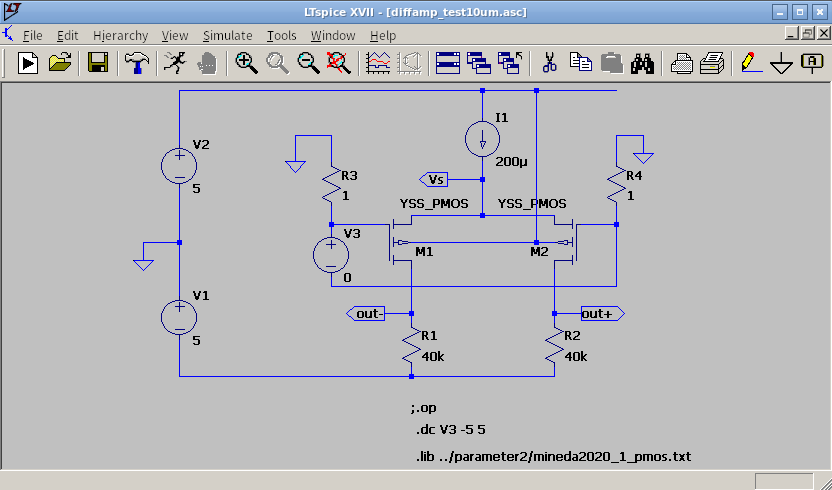

出力プロット
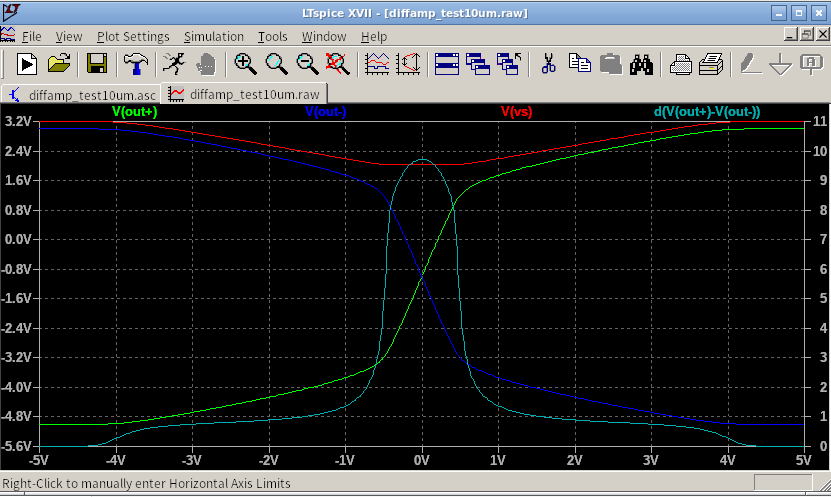

# 【テール電流源の設計】

・テール電流源が理想電流源だったので，これをリアルの電流源置き換える．ポイントは出力抵抗の値と|Vds|の必要最小値だ．

・出力抵抗Routは大きいほど良いから，PMOSはできるだけLの大きいものを使うのが常識だが，測定していないデバイスは使いたくないので，L=14umのPMOSでシミュレーションして探る．IQ=200uAの電流源をシミュレーションする．L=W=14umで試そう．結果は次の通り：

## (1)単なるカレントミラー(W=L=14um):
　Max(Rout)=400kΩ ＠|Vds|=8.4V
　Rout≧200kΩ を保つ|Vds|の範囲は4.66V~10V
　(参照：currentsource_test(14um).asc, currentsource_test(14um).plt)

これだとRoutが小さすぎ，|Vds|も大きすぎる（理想電流源のシミュレーションから，|Vds|≦3.0Vが必要；すなわち-5V≦Vout≦2.0Vの範囲でRout≧1MΩが確
保できる必要がある）．単なるカレントミラー(CM)ではダメなことが分かったので，次は2階建て構造（カスコードCMとウィルソンCM）を試す．

なお，Rout≧1MΩの条件は，差動対の同相利得AcmがAcm≒(RL/2)/Routで与えられるので，Acm≦20kΩ/1MΩ=1/50を目安としたまで．例えばAcm≦1/100としてもよい(＝大差ない)．Acmは小さいほど良い．念のため．

In [4]:
ckt.open('currentsource_test14um.asc')

elements updated from currentsource_test14um.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "V1"=>{:value=>"5", :type=>"voltage", :lineno=>41}, "M1_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>44}, "M1_2"=>{:value=>"l=14u w=14u", :type=>"pmos4", :lineno=>46}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>51}, "I1"=>{:value=>"200u", :type=>"current", :lineno=>56}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>59}, "M2_2"=>{:value=>"l=14u w=14u", :type=>"pmos4", :lineno=>61}, "V3"=>{:value=>"5", :type=>"voltage", :lineno=>66}, "dc"=>[{:control=>"!.dc V3 -5 5", :lineno=>67}], "lib"=>[{:control=>"!.lib ../parameter2/mineda2020_1_pmos.txt", :lineno=>68}]}

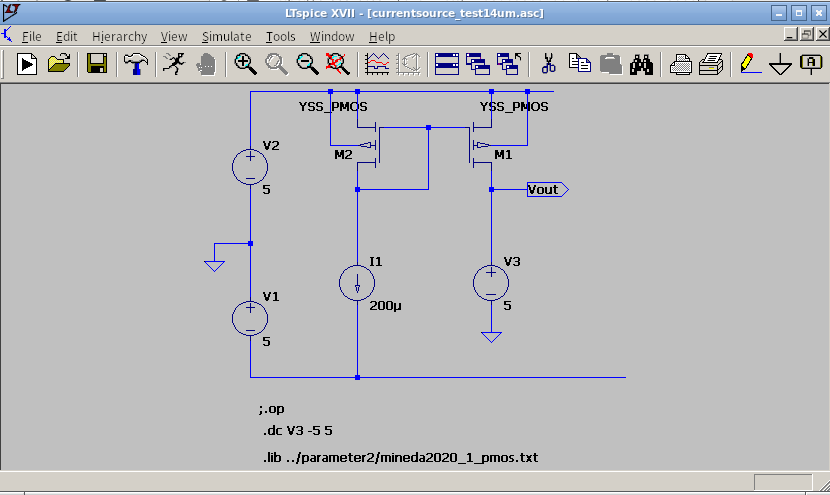

## (2)カスコードCM(W/L=280um/14um):
　MAX(Rout)=12.4MΩ ＠|VDD-Vout|=7.8V(つまりM1とM4の|Vds|の和)
　Rout≧1MΩ を保つVoutの範囲は -5V~2.5V
　(参照：currentsource_test(14um)cascode.asc, currentsource_test(14um)cascode.plt)

ここでW=280umと大きくとったのは，理想電流源によるシミュレーションから，-5V≦Vout≦2Vの範囲でRout≧1MΩを満足させるためである．例えば，W=14umならRout≧1MΩ を保つ範囲は-5V≦Vout≦1.0Vであり，差動対の同相入力範囲はおよそ-5V~0Vとなり，具合が良くない．

(シミュレーションはcurrentsource_test(14um)cascode.asc, currentsource_test(14um)cascode.pltを走らせてください）

In [5]:
ckt.open('currentsource_test14umcascode.asc')

elements updated from currentsource_test14umcascode.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "V1"=>{:value=>"5", :type=>"voltage", :lineno=>52}, "M1_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>55}, "M1_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>57}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>62}, "I1"=>{:value=>"200u", :type=>"current", :lineno=>67}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>70}, "M2_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>72}, "V3"=>{:value=>"5", :type=>"voltage", :lineno=>77}, "M3_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>80}, "M3_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>82}, "M4_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>85}, "M4_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>87}, "dc"=>[{:control=>"!.dc V3 -5.0 5.0 ", :lineno=>88}], "lib"=>[{:control=>"!.lib ../parameter2/mineda2020_1_pmos.txt", :lineno=>89}]}

In [6]:
Dir.glob('*.asc')

["mmm-CMoutSensitivity.asc", "currentsource_test14umWilson.asc", "calc_gm.asc", "DiffAmp.asc", "diffamp_test10umrealCS-Vcm-gain.asc", "currentsource_test14umcascode.asc", "LevelShifter-test14umS.asc", "diffamp_test10umrealCS.asc", "diffamp_test10um.asc", "currentsource_test14um.asc"]

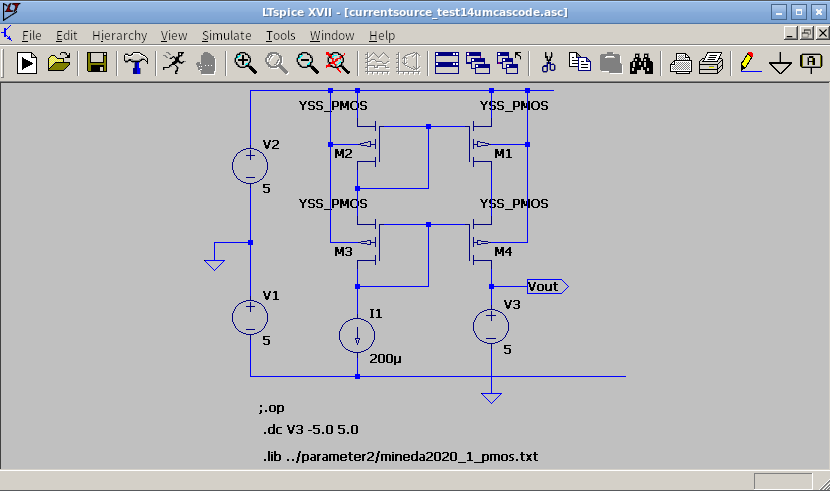

## (3)もう少しVoutを頑張れないか，ウィルソンCMも試してみる．
(3-1)単純なウィルソンCM
　MAX(Rout)=13.7MΩ ＠Vout=-2.46V
　Rout≧1MΩ を保つVoutの範囲は -5V~2.84V
　M6,M5:W/L=420um/14um=30, M8:W/L=560um/14um=40
　(参照：currentsource_test(14um)Wilson.asc, currentsource_test(14um)Wilson.plt)

　Voutの範囲を広げるため，大きなWを使わざるを得なかった．また，左右のVdsの違いにより，電流が180uAに目減りしたが，これは容易に修正可能．

(3-2)Vdsを合わせた精密ウィルソンCM
　MAX(Rout)=13.1MΩ ＠Vout=-2.66V
　Rout≧1MΩ を保つVoutの範囲は -5V~2.66V
　M1,M2:W/L=280um/14um=20, M3,M4:W/L=560um/14um=40
　(参照：currentsource_test(14um)Wilson.asc, currentsource_test(14um)Wilson.plt)

どちらでも大差はないが，面積的には精密ウィルソンCMが得だと判断する．

（シミュレーションはcurrentsource_test(14um)Wilson.asc, currentsource_test(14um)Wilson.pltを走らせてください）1

In [7]:
ckt.open('currentsource_test14umWilson.asc')

elements updated from currentsource_test14umWilson.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "V1"=>{:value=>"5", :type=>"voltage", :lineno=>96}, "M1_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>99}, "M1_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>101}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>106}, "I1"=>{:value=>"200u", :type=>"current", :lineno=>111}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>114}, "M2_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>116}, "V3"=>{:value=>"5", :type=>"voltage", :lineno=>121}, "M3_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>124}, "M3_2"=>{:value=>"l=14u w=14u m=40", :type=>"pmos4", :lineno=>126}, "M4_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>129}, "M4_2"=>{:value=>"l=14u w=14u m=40", :type=>"pmos4", :lineno=>131}, "V4"=>{:value=>"5", :type=>"voltage", :lineno=>136}, "M5_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>139}, "M5_2"=>{:value=>"l=14u w=14u m=30", :type=>"pmos4", :lineno=>141}, "V5"=>{:value=>"5", :type=>"voltage", :lineno=>14

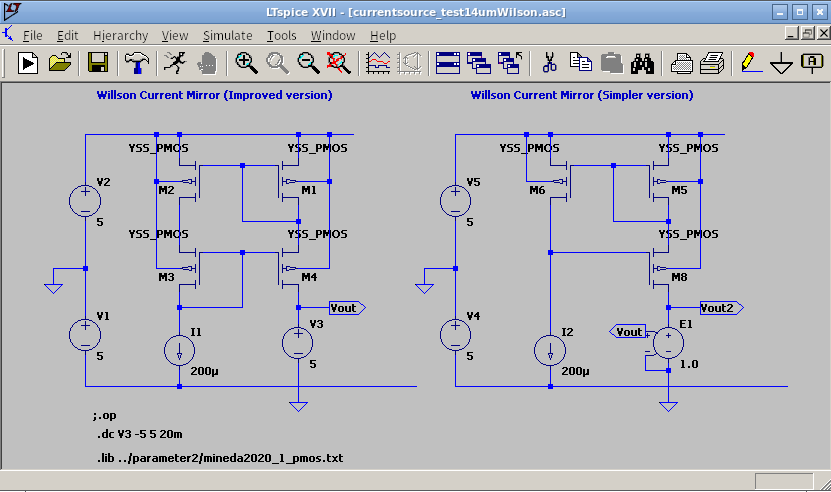
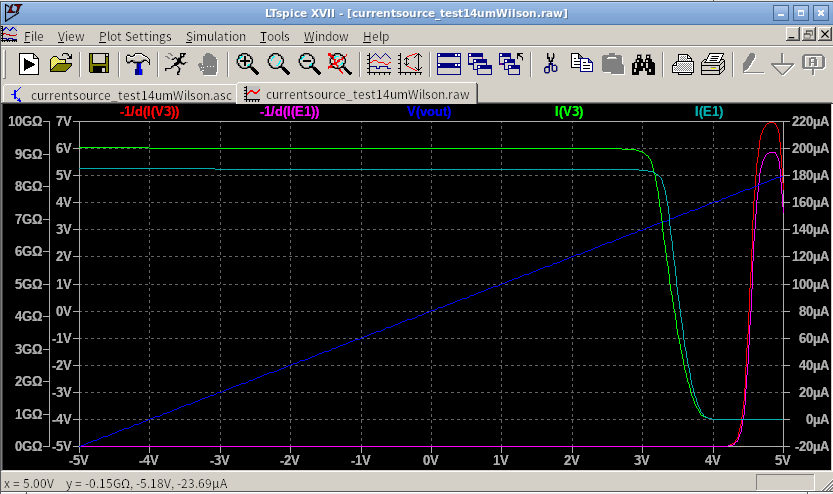

# 【差動対とテール電流源の合体】

先に設計してあった差動対(W/L=100um/10um)と上記(2)のカスコードCMを合体させてみる．理想電流源を用いて行ったシミュレーション結果と，カスコードCMを用いて行った結果は殆ど一致している:最大差動利得MAX(Ad)=-9.7倍＠Vicm=0V, 出力同相電圧Vocm=-1V

ただし，このシミュレーション（currentsource_test(14um)cascode/asc, currentsource_test(14um)cascode.plt ）は差動入力・差動出力に関するものだけ．同相入力・同相出力もシミュレーションする必要がある（大丈夫だった）．結局ウィルソンCMは使わないで済みそう．

In [8]:
ckt.open('diffamp_test10umrealCS.asc')

elements updated from diffamp_test10umrealCS.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "V1"=>{:value=>"5", :type=>"voltage", :lineno=>82}, "M1_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>85}, "M1_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>87}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>92}, "I1"=>{:value=>"200u", :type=>"current", :lineno=>97}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>100}, "M2_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>102}, "V3"=>{:value=>"5", :type=>"voltage", :lineno=>107}, "M3_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>110}, "M3_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>112}, "M4_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>115}, "M4_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>117}, "M5_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>120}, "M5_2"=>{:value=>"l=10u w=10u m=10", :type=>"pmos4", :lineno=>122}, "M6_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>125}, "M6_2"=>{:value=>"l=10u w=10u m=10", :type=>"

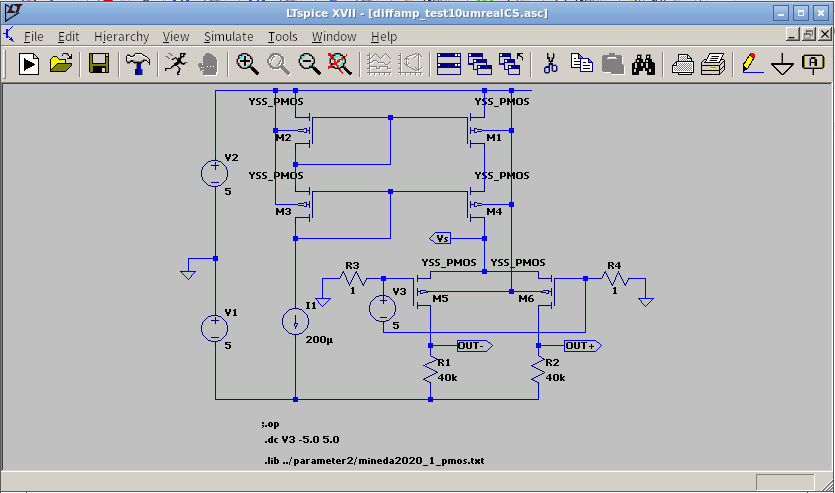
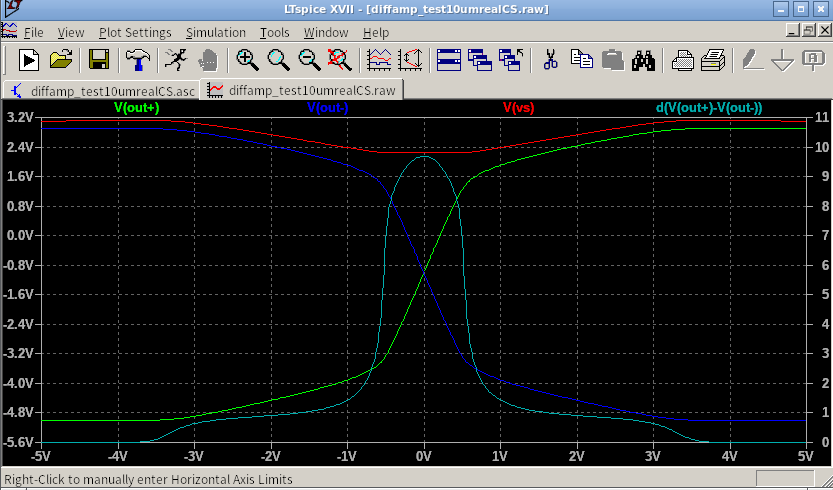

これで，一応，1段PMOS差動増幅回路の仮完成とします．次は100倍程度の利得を稼ぐため，同じ差動増幅回路を2段構成にしますが，その際，1段ごとに出力の同相出力電圧が1V下がってゆきますので，2段目の入力同相電圧を-1Vから0V付近に戻すため，ソースフォロワを使ったレベルシフト（電圧レベルの平行移動）回路を1段目と2段目の間に挿入します．最後はレベルシフトとバッファを兼ねて，もう1段ソースフォロワを追加します．大体はこれでいいのですが，最終出力の同相電圧をきっちり0Vにするため，同相負帰還回路を追加する必要があるかもしれません．これは，追々シミュレーションしながら判断します．


# 差動電圧利得が入力の同相電圧でどう変わるか
設計したPMOSの1段差動アンプの，差動電圧利得が入力の同相電圧でどう変わるかをシミュレーションした結果です．回路はdiffamp_test(10um)realCS-Vcm-gain.asc, diffamp_test(10um)realCS-Vcm-gain.pltでシミュレーションしてください．結果は　Vcm1.xlsx　です

In [9]:
ckt.open('diffamp_test10umrealCS-Vcm-gain.asc')

elements updated from diffamp_test10umrealCS-Vcm-gain.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "V1"=>{:value=>"5", :type=>"voltage", :lineno=>84}, "M1_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>87}, "M1_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>89}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>94}, "I1"=>{:value=>"200u", :type=>"current", :lineno=>99}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>102}, "M2_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>104}, "V3"=>{:value=>"5", :type=>"voltage", :lineno=>109}, "M3_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>112}, "M3_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>114}, "M4_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>117}, "M4_2"=>{:value=>"l=14u w=14u m=20", :type=>"pmos4", :lineno=>119}, "M5_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>122}, "M5_2"=>{:value=>"l=10u w=10u m=10", :type=>"pmos4", :lineno=>124}, "M6_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>127}, "M6_2"=>{:value=>"l=10u w=10u m=10", :type=>"

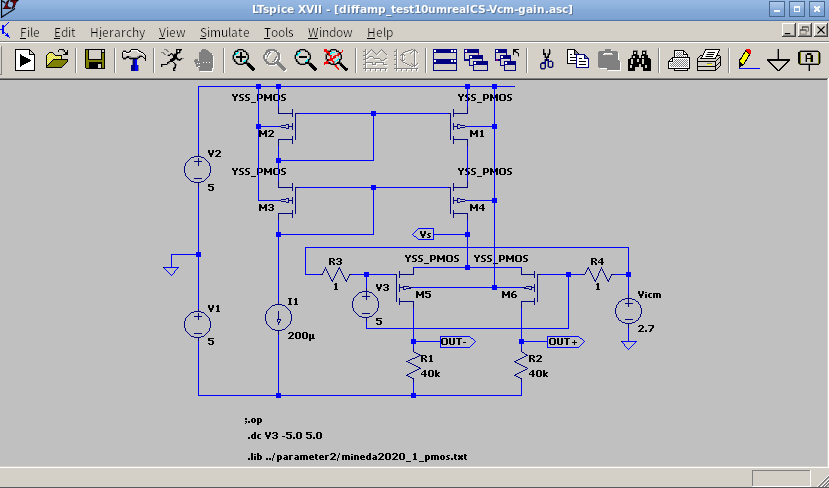

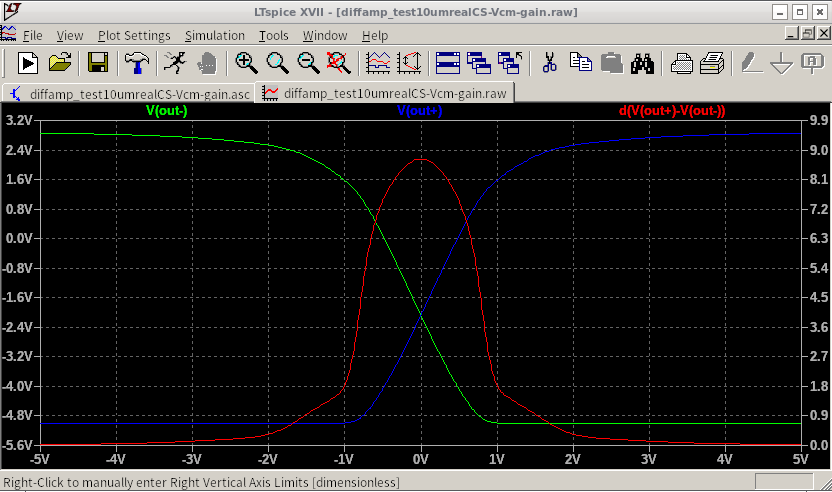
結局，この差動アンプは同相入力が±2Vくらいの範囲で使えることが分かる．本当は0V~2Vくらいの方が調子いい．

# 【問題発生】
2段差動増幅器ですが，一応全部できたので，AD,AS,PD,PSを入れて全体でシミュレーションしてみたところ，10倍の仕上がり利得で負帰還を掛けたとき，予想外に同相で発振していました＠約2MHz. 差動アンプなので同相利得はどう考えても1倍以下のはずで，油断していましたが，電流源に大きなトランジスタを使ったので，寄生容量がつき，高域で電流源のインピーダンスが下がったことが原因だと思います．つまり，エミッタ抵抗にバイパスコンデンサを入れたのと同じ状態になったようです．という事で，設計をやり直すハメに陥りました．以上，ご報告まで．
＃しかし，容量のパラメータがどれくらいあてになるのか，また，レイアウトしてからでないと正確なAD,AS,PD,PSがわからないのが困ったものです．上のシミュレーションではm=10などとやらず，1個のでかいPMOSがあると考えてAD等を算出しました．

## 電流源の寄生容量でCMRRが悪化する理由の説明
本当に作りたかったのは(a)のPMOS差動アンプです．こいつの同相利得は，Vi+=Vi-=Viとしたときの出力Vo+=Vo-=Voまでの利得です．これを計算するには，(b)のように差動対の部分を1個の2xのPMOSと考えたのと同じことです．これを同相半回路と呼んでます．さて，電流源IQに寄生容量Cpが付くと，差動対側から電流源側を見込んだインピーダンスが高域で低下します．非常に高い周波数ではそのインピーダンスは非常に小さいので，電流源は直流電流IQを流しつつ，その内部インピーダンスは短絡に見えます．そうすると(c)のようにPMOSのソース接地回路と看做せます．(c)の（同相）利得はVo/Vi=-gm(RD/2)となります．
一方，電流源に寄生容量がない場合は(d)のような同相半回路になるので，その（同相）利得はVo/Vi≒-(RD/2)/RQ→0 (as RQ→∞) となります．つまり，理想的には差動アンプは同相利得がゼロになるハズのところ，寄生容量の存在により広域では利得が1以上になります．シミュレーションによれば全体の同相利得は低域で-50dBでしたが，2MHz付近で+10dB くらいあり，そのまま負帰還を掛けると発振する可能性がある，という事になります．
以上，説明おしまい．
＃NMOSがあればPMOS差動対の負荷はNMOSカレントミラーにするので，カレントミラーにおける同相抑圧が40dBとか追加され，このようなことは起らないので，ちょっと注意が必要です．

![title](https://cdn.discordapp.com/attachments/720808735387287555/743363568660905994/CMRRa.png)

## 位相補償を検討した結果を報告します．
結論から言うと，中和キャパシタはなし，位相補償キャパシタは50pFで何とか行けそうです（パッドの10pF~20pFもあてにして）．忘れないうちにアップしておきますね．位相余裕は45°必要だという事ですので，CL=50pFだと，位相補償キャパシタは70pF以上必要ですが，50pFでも30℃前後の位相余裕があるので，100%の帰還を掛けても（バラツキを含めて）たぶん発振はしないと思います．詳細は後日．
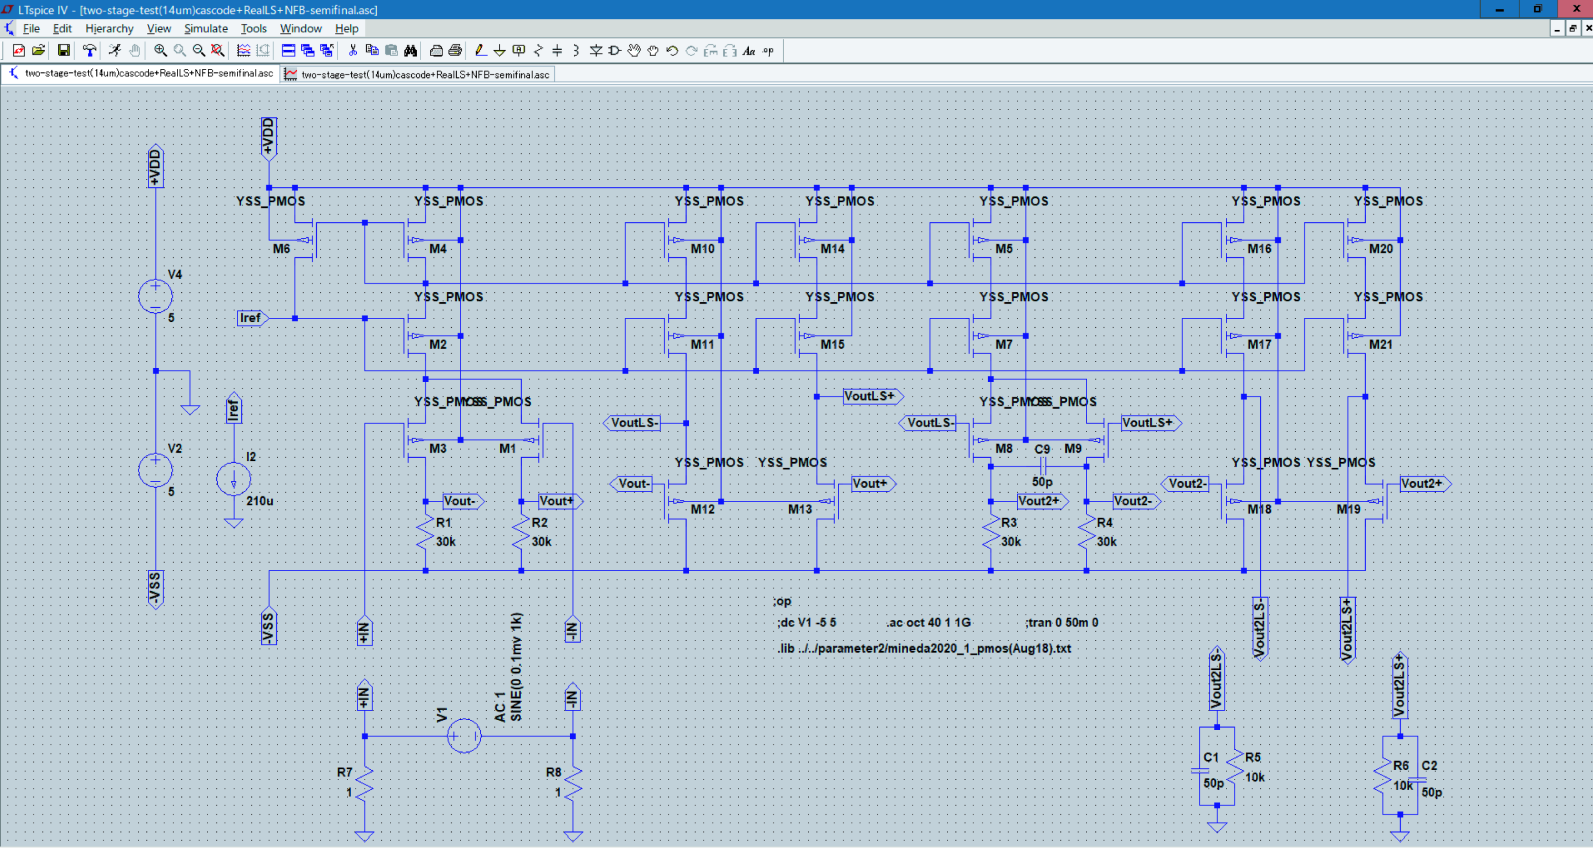
![](https://cdn.discordapp.com/attachments/720808735387287555/745645303054467212/da405c3ea7a2a169.png)
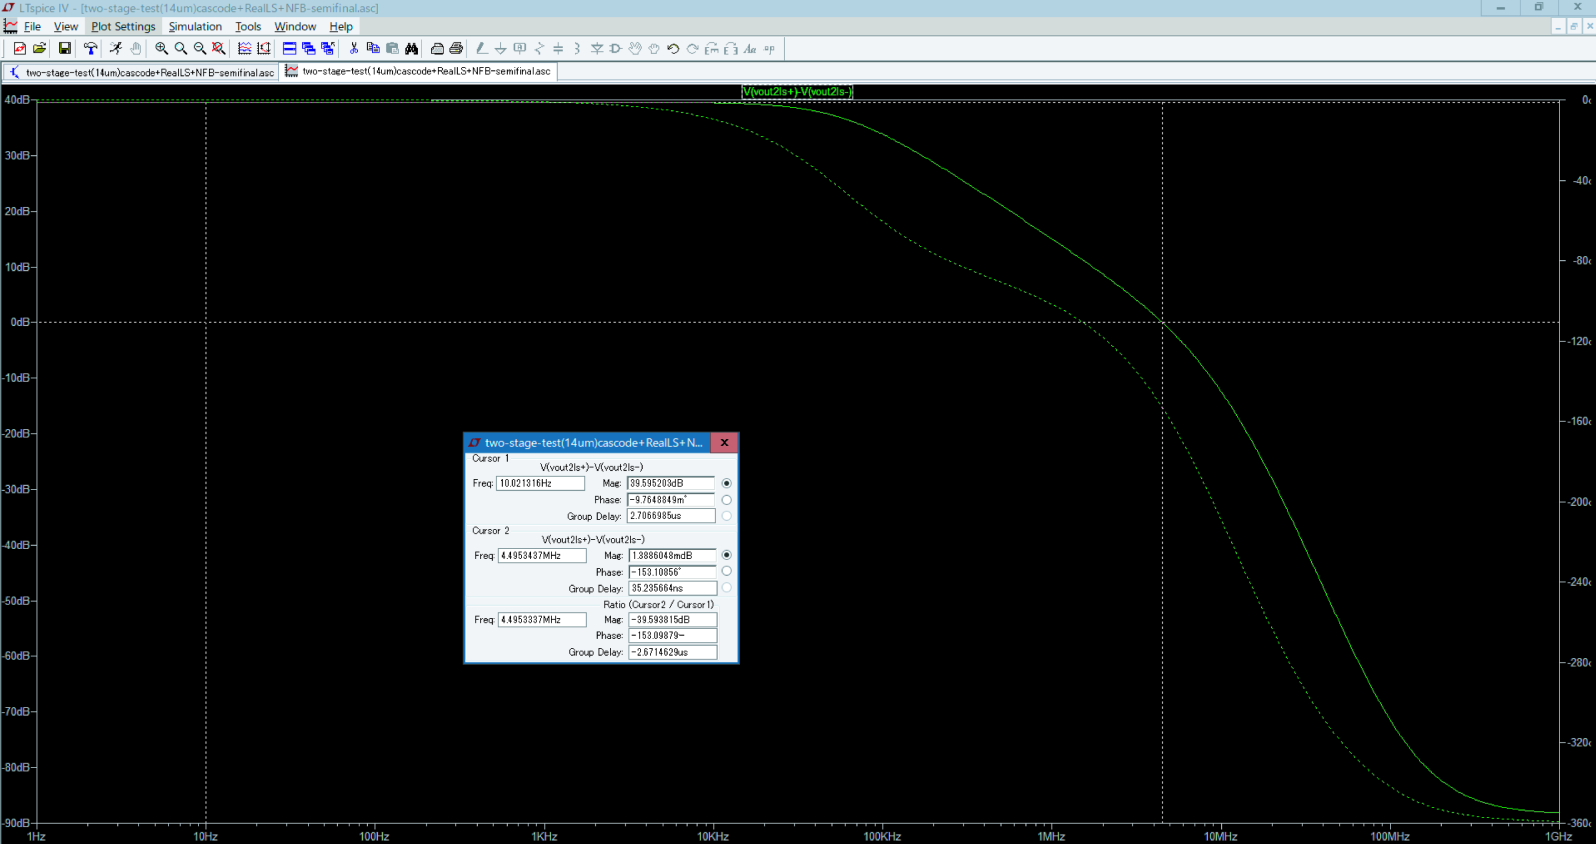

## レベルシフト回路(LS)の検討結果をアップします．
結局，抵抗性のLSは利得の損が大きく，ただでさえ少ないゲインを損するため，使えないという事が結論です．という事で，昨日の報告のとおりソースフォロワによるLSを採用しました．ただし，ソースフォロワLSの悪いところは，バックゲート効果のため歪が発生することです．


![](https://cdn.discordapp.com/attachments/720808735387287555/745898515993198602/d20df25713803289.png)

In [10]:
ckt.open('LevelShifter-test14umS.asc')

elements updated from LevelShifter-test14umS.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "M6_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>154}, "M6_2"=>{:value=>"l=14u w=280u ad=3.92n as=3.92n pd=308u ps=308u", :type=>"pmos4", :lineno=>156}, "I2"=>{:value=>"220u", :type=>"current", :lineno=>161}, "M2_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>164}, "M2_2"=>{:value=>"l=14u w=84u ad=1.176n as=1.176n pd=112u ps=112u", :type=>"pmos4", :lineno=>166}, "M3_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>169}, "M3_2"=>{:value=>"l=10u w=200u ad=2.0n as=2.0n pd=220u ps=220u", :type=>"pmos4", :lineno=>171}, "R1"=>{:value=>"30k", :type=>"res", :lineno=>174}, "V1_1"=>{:value=>"SINE(0 30mv 4k)", :type=>"voltage", :lineno=>179}, "V1_2"=>{:value=>"AC 1", :type=>"voltage", :lineno=>180}, "V2"=>{:value=>"5", :type=>"voltage", :lineno=>186}, "R2"=>{:value=>"30k", :type=>"res", :lineno=>189}, "M4_1"=>{:value=>"YSS_PMOS", :type=>"pmos4", :lineno=>192}, "M4_2"=>{:value=>"l=14u w=280u ad=3.92n as=3.92n pd=308u ps=308u", :type=>"pmos4", :

## オープンループの差動利得および同相利得のボーデ線図をアップします．
オープンループの差動利得および同相利得のボーデ線図をアップします．どちらも負荷は±の出力端子とGNDの間にそれぞれ 10kΩ||50pF を付けました（最悪条件です）．wmf形式の図がうまく表示されないようなので，同じものをeps形式でもアップしました．
同相の開ループ利得は低域で-62dB，2MHz~
3MHzで-31dBまで上昇しますが，1GHZまでの範囲で0dB以下ですから，全量帰還でも安定です．
差動の開ループ利得は低域で39.6dB≒95.5倍です．ユニティゲイン周波数はfT=4.50MHzで，位相余裕は26.9°です．全量帰還しても発振はしませんが，2MHz付近で1~2dBのピークを生ずるでしょう．

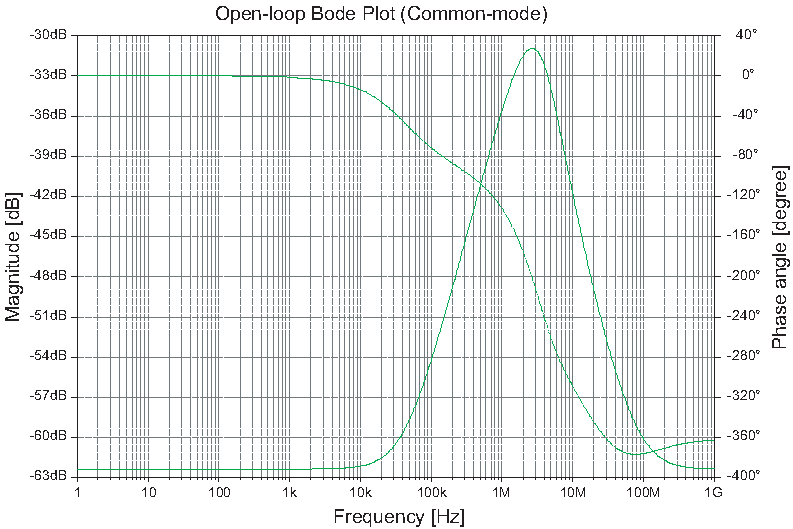
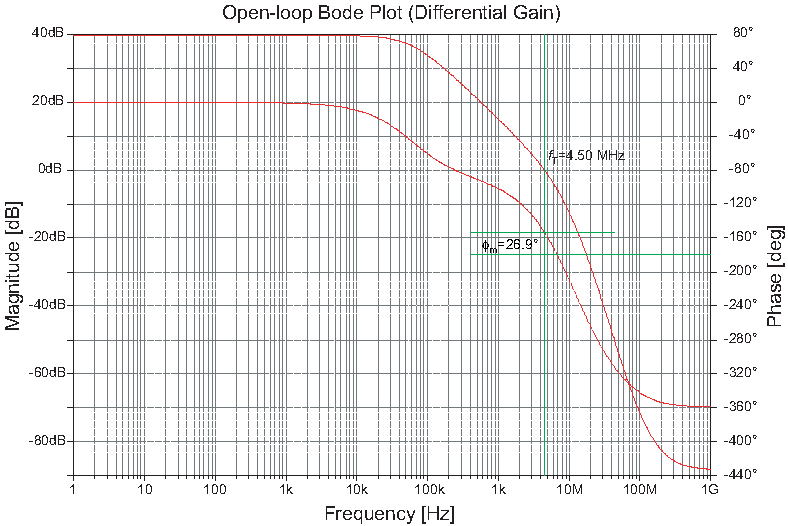

## オープンループのステップ応答です．
特にリンギングもなく，立ち上がりも速いです（0dB帯域幅が4.5MHzもあるから）．入力は±10mVの差動ステップ電圧です．利得が95.5倍だから，出力は±0.955Vとなるべきところ，オフセット電圧が31.1mVありますので，ちょっと中心(０V)からズレています．オフセット電圧の入力換算値は(31.1mV/95.5)*0.5=0.65mVです．実際は，これに初段PMOSのオフセット電圧（数十mV；Vgsのミスマッチ）が加算され，そっちの方が支配的です．負荷は上記に同じで，それぞれ10kΩ||50pFです．グラフは示しませんが，出力は±2.5Vでクリップします．歪まない入力は正弦波で40ｍVp-p以下といったところです．

![](https://cdn.discordapp.com/attachments/720808735387287555/747759787865014382/bd22337c5085c6e9.png)

## Irefのバラツキに対して出力のVcmが変動する件のシミュレーションをしてみました．
結果は，Iref=200uA~220uAの変動に対して，Vcmは270mV変化しました．これを許容するか，という問題が発生します．Vcmの変動を完全に抑え込むには，やはり同相帰還回路を追加する必要がありそうですが，PMOSしかないと制約が大きいので，できればやりたくありません．どういたしましょうか？追試のためのシミュレーションファイルも添付します．

![](https://cdn.discordapp.com/attachments/720808735387287555/748074793332506654/mmm-CMoutSensitivity.gif)

![](https://cdn.discordapp.com/attachments/720808735387287555/748074822814269490/Iref.gif)

In [11]:
ckt.open('mmm-CMoutSensitivity.asc')

elements updated from mmm-CMoutSensitivity.asc!


{nil=>{:value=>nil, :type=>nil, :lineno=>0}, "Iref"=>{:value=>"208u", :type=>"current", :lineno=>98}, "Vin-diff"=>{:value=>"SINE(0 100m 1k)", :type=>"voltage", :lineno=>102}, "V2_1"=>{:value=>"5", :type=>"voltage", :lineno=>109}, "V2_2"=>{:value=>"AC 1", :type=>"voltage", :lineno=>107}, "R5"=>{:value=>"10k", :type=>"res", :lineno=>112}, "R6"=>{:value=>"10k", :type=>"res", :lineno=>115}, "V4"=>{:value=>"5", :type=>"voltage", :lineno=>120}, "R7"=>{:value=>"1", :type=>"res", :lineno=>125}, "R8"=>{:value=>"1", :type=>"res", :lineno=>130}, "C1"=>{:value=>"50p", :type=>"cap", :lineno=>133}, "C2"=>{:value=>"50p", :type=>"cap", :lineno=>136}, "Vin-cm"=>{:value=>"0", :type=>"voltage", :lineno=>141}, "R9"=>{:value=>"100k", :type=>"res", :lineno=>146}, "R10"=>{:value=>"100k", :type=>"res", :lineno=>151}, "R11"=>{:value=>"100k", :type=>"res", :lineno=>156}, "R12"=>{:value=>"100k", :type=>"res", :lineno=>161}, "C3"=>{:value=>"1p", :type=>"cap", :lineno=>166}, "X1"=>{:value=>nil, :type=>"DiffAmp", :

# 同相出力のオフセットの件
同相出力のオフセットの件ですが，ただどうしましょ？といってもわからないと思いますので，どういう影響があるのか少し解説します（長文です）．本アンプは差動入力差動出力のアンプですから，入力から出力までの差動-差動利得（約100倍），同相-同相利得（低域で約1/1,250倍）があります．したがって，低域における同相信号抑圧比はCMRR=100/(1/1,250)=102dBもの値となりますので，同相入力が増幅されて出力でオフセットを発生する恐れは無視できます．このほか，差動-同相利得と同相-差動利得もありますが，これらは差動対の対称性が良いため非常に小さい値であり，通常考える必要はありません（シミュレーションすると-300dB?とかになります）．

* 正負の差動出力端子は，それぞれ±2.5Vづつスイングしますので，両者の差である差動出力では±5Vスイングします．
* これに対して，正負の差動出力端子の平均出力電圧である同相出力電圧は，同相利得が非常に小さいので，殆ど一定値を示します．この一定値はゼロ付近である必要があり，無入力の時のその値を同相出力電圧といいます．いうなれば，正負の差動出力端子の電圧がシーソーの両端の高さで，支点の高さが同相出力電圧ですので，支点は常に中心（ゼロ）にあるのが望ましいわけです．
* +Vout-(-Vout)である差動出力だけを見るのであれば，同相出力電圧（支点）は変化してもキャンセルするので問題ないですが，支点が中心からズレると，差動出力端子のスイングの中心が±2.5Vのど真ん中ではなくなるので，上下のどちらかが先にクリップして，無歪のスイング幅を損することになります．同相電圧のゼロからのずれがスイング幅±2.5Vに比べて無視できれば，実用上問題ないと言えます．常識的にはスイング幅の10%以下なら深刻な問題ではないでしょう．しかし，精密な直流増幅用途（例えば低出力のセンサ信号の増幅）では，無入力ににもかかわらず非ゼロの出力が出るのはマズイので，必要な値に抑圧する（コントロールする）必要の生ずる場合があります．いずれにせよ，用途によって同相出力電圧の仕様が違ってきます．
* 本アンプにおいて（無入力時の）同相出力電圧（VCMとします）を外部から（＝外付けで）コントロールする方法としては，参照電流Irefを調整する方法があります．要するに，出来上がったアンプを1個づつ測定してVCMがゼロになるようなIrefに固定する，という事です．この方法によって，製造バラツキによるVCMのバラツキは吸収できると思います．
* しかし，真の問題は，温度変化や電源電圧の変動，経時変化などにより，出荷時にIrefで調整したとしても，その後VCMは変動する可能性があるという事です．この変動は予測できないので，Irefの変化に対するVCMの変化が少ない方が具合がよいわけです．それで，上記の「VCMのIrefに対する感度」をシミュレーションしました．その結果，出荷時にIrefを調整しておけば，その後の環境変化によるIrefの変化が10%以内であればVCMの変動は270mV以内に抑えられるという事が分かりました．また，電源電圧が1%変化すると，VCMも1%変化することが分かりました．
* VCMの変動を根本的に抑えるには，出力のVCMを検出してIrefに負帰還を掛けるのが効果的な方法だと思います（他の方法は考え付かない）．負帰還のループ利得を40dB取れば，VCMの変動を40dB抑圧できます．つまり，VCMが100mV変化しても1mVの変動に抑え込めます．そのためにはgm=10mS程度のVCCSが必要ですが，同相帰還回路をチップ上に内蔵させるのは，NMOSが使えないためIrefへの帰還が面倒そうです．もちろん，外付けの回路でやればO.K.ですよ．
* 厳密にいえば，差動出力のオフセット成分（＝無入力でも最初からシーソーが傾いている状態）が入力換算で数十mVある（普通のプロセスでね）と予想されるので，これを調整してシーソーを平らにすることも，必要なら外付け回路で行う必要があります．仮にオープンループで使用するとすれば，利得が100倍ありますから，出力では数Vの差動出力になりますので，放置できません．これもPMOSのVTHバラツキが分からないので，放置するのが良策でしょう．

以上，同相オフセットの説明でした．ご質問はご遠慮なく．